#### Creating a historgram from data & converting to probability density
#### Proportion vs. probability

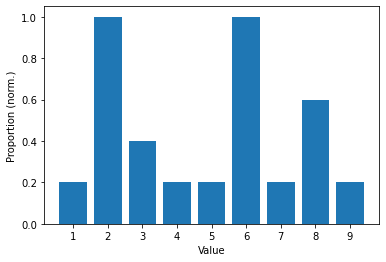

In [12]:
import numpy as np
import matplotlib.pyplot as plt

data = [1, 2, 2, 2, 2, 2, 3, 3, 4, 5, 6, 6, 6, 6, 6, 7, 8, 8, 8, 9]

#plt.hist(data)
#plt.xlabel('Value')
#plt.ylabel('Number of appearance (count)')
#plt.show()

y, x = np.histogram(data, bins=np.arange(1,11))
yP = y/np.max(y)

plt.bar(x[:-1], yP)
plt.xlabel('Value')
plt.ylabel('Proportion (norm.)')
plt.xticks(np.arange(1, 10))
plt.show()


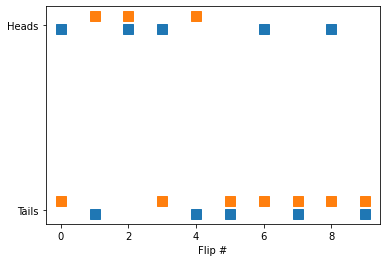

In [21]:
faircoin = .5
biascoin = .9

nTrials = 10

results = np.zeros((2, nTrials))

for i in range(0, nTrials):
    results[0,i] = np.random.rand()>faircoin
    results[1,i] = np.random.rand()>biascoin
    
plt.plot(results[0,:]-.02, 's', markersize=10, label='fair coin')
plt.plot(results[1,:]+.05, 's', markersize=10, label='bias coin')
plt.xlabel('Flip #')
plt.yticks([0, 1], ['Tails', 'Heads'])
plt.show()

ValueError: incomplete format

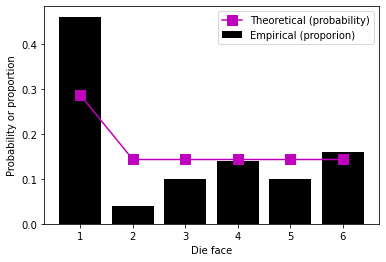

In [38]:
n = 50
outcomes = np.zeros(6)
pureprobs = np.array([2, 1, 1, 1, 1, 1])
pureprobs = pureprobs / np.sum(pureprobs)

for i in range(n):
    # roll a 7-sided die
    dieroll = np.random.randint(0, 7)
    # make die biased
    if dieroll == 6:
        dieroll = 0
        
    outcomes[dieroll] += 1
    
plt.bar(range(1,7), outcomes/n, color='k', label='Empirical (proporion)')
plt.plot(range(1,7), pureprobs, 'ms-', markersize=10, label='Theoretical (probability)')
plt.xlabel('Die face')
plt.ylabel('Probability or proportion')
plt.legend()


for i in range(1, 7):
    plt.text(i, outcomes[i-1]/n-.025, '%s' %(outcomes[i-1]/n), color='w', fontsize=12, horizontalalignment='center')

plt.show()